# Machine Learning Models from Scratch

## Linear Regression

In [69]:
# Only numpy bitch! fuck yo scikit.... ok now do it without numpy... 
import numpy as np

# little bit of matplot tho
import matplotlib.pyplot as plt

In [71]:
class LinearRegression:

    def __init__(self, learning_rate = 0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)

        y = y.ravel()
        
        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.theta)

            gradient = -(2 / n_samples) * np.dot(X.T, (y - y_pred))

            self.theta = self.theta - self.learning_rate * gradient

    def predict(self, X):
        return np.dot(X, self.theta)

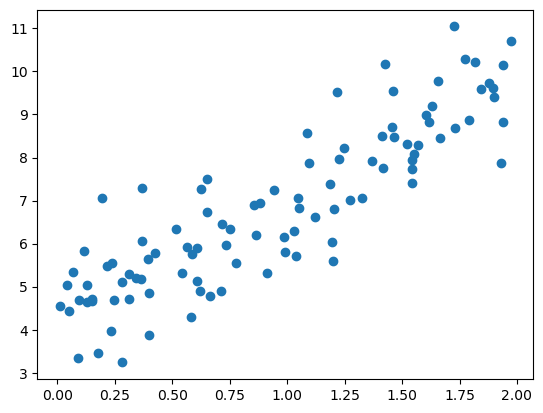

In [73]:
# Create our data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((X.shape[0], 1)), X]

# visualise our data
plt.scatter(X, y)


In [75]:
# Train the beast

lin_reg = LinearRegression()
lin_reg.fit(X_b, y)

In [81]:
y_pred = lin_reg.predict(X_b)
print("Learned weights (theta):", lin_reg.theta)

Learned weights (theta): [4.1819175  2.79940834]


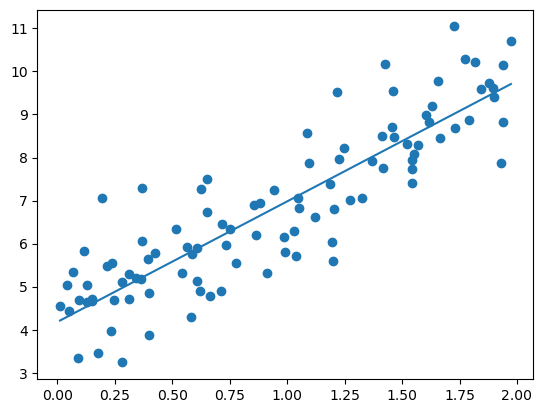

In [10]:
# Revisualise with theta
plt.scatter(X, y)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_b = np.c_[np.ones((X_range.shape[0], 1)), X_range]
y_pred = X_range_b.dot(lin_reg.theta)

plt.plot(X_range, y_pred)

so this is great and all... but I still didn't derive this from scratch myself... i had help... im pathetic at this stuff... i try again!

## Procedurally building linear_regression

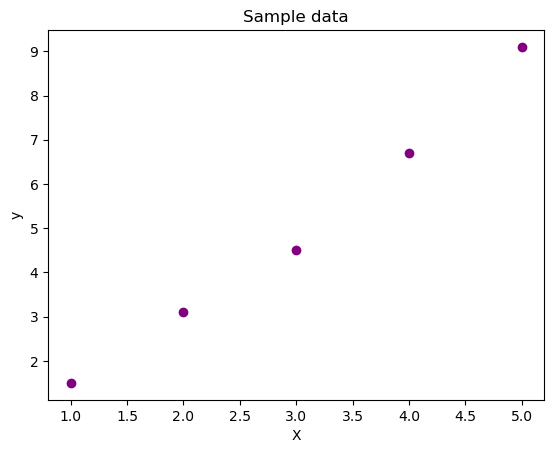

In [48]:
# X = 2 * np.random.randn(100, 1)
# y = 1 + 2 * X + np.random.randn(100,1)
X = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([1.5, 3.1, 4.5, 6.7, 9.1])

plt.scatter(X,y, color="purple")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sample data")
plt.show()

In [50]:
# Add the bias

X_b = np.c_[np.ones((X.shape[0], 1)), X]
X_b

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [52]:
# initialize weights

theta = np.zeros(X_b.shape[1])
theta

array([0., 0.])

In [54]:
# Calculate a prediction

y_pred = np.dot(X_b, theta)
y_pred

array([0., 0., 0., 0., 0.])

In [56]:
# Define the cost function

def compute_cost(X_b, y, theta):
    n_samples = len(y)
    y_pred = np.dot(X_b, theta)
    cost = (1/n_samples) * np.sum((y - y_pred) **2)
    return cost

initial_cost = compute_cost(X_b, y, theta)
initial_cost

31.962000000000003

In [63]:
# Running gradient decent

learning_rate = 0.01
n_iterations = 1000
XX = []
yy = []
for iteration in range(n_iterations):
    y_pred = np.dot(X_b, theta)
    gradient = -(2/len(y)) * np.dot(X_b.T, (y-y_pred))
    theta -= learning_rate * gradient
    XX.append(theta[0])
    yy.append(theta[1])

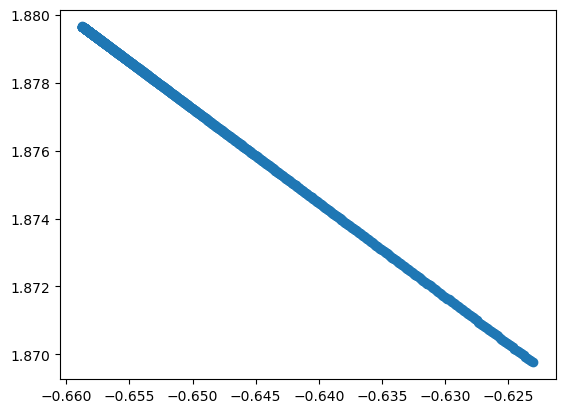

In [67]:
y_pred = np.dot(X_b, theta)

plt.scatter(XX, yy)
# plt.plot( X, y_pred)

## My Lin reg with steps (Future me needs to look here)

So again from the top:

1 - Get the data, your x and ys
2 - Reshape your Xs
3 - add the bias term to X; a column of ones
4 - initialize theta; an array of 0s with as many elemtns(columns) as features of X_b, I think only 2 for linear reg
5 - perform gradient decent to fit the data i.e make theta great (find the best slope)
    5.1 - make a predict using the dot product
    5.2 - calculate gradient decent
    5.3 - optimise gradient decent
6 - make predictions
7 - visualize training data, regression line and new prediction

X_bais [[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
Theta initialized [0. 0.]
Found theta [0.99212849 1.01880057]
Predictions on the trainig data: [ 2.01092906  3.02972963  4.0485302   5.06733077  6.08613134  7.1049319
  8.12373247  9.14253304 10.16133361]
Predicitions on the new data:  [11.18013418 13.21773531]



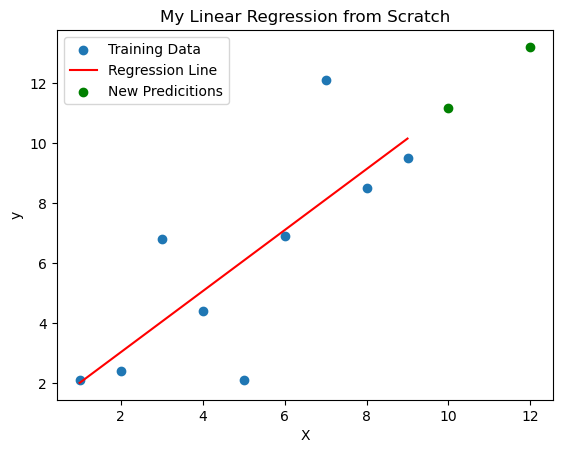

In [209]:
# 1 & 2
X = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1, 1)
y =np.array([2.1,2.4,6.8,4.4,2.1,6.9,12.1,8.5,9.5])

# 3
X_b = np.c_[np.ones((X.shape[0], 1)), X]
print("X_bais", X_b)

# 4
theta = np.zeros(X_b.shape[1])
print("Theta initialized", theta)

# 5
learning_rate = 0.01
iterations = 1000
for _ in range(iterations):
    # 5.1
    y_pred = np.dot(X_b, theta)

    # 5.2
    gradient = 2/len(y) * X_b.T.dot(X_b.dot(theta) - y) # or -(2 / len(y)) * np.dot(X_b.T, (y - y_pred))

    # 5.3
    theta = theta - learning_rate * gradient

print("Found theta", theta)

# 6 
# on the training data
y_training_pred = np.dot(X_b, theta)
print("Predictions on the trainig data:", y_training_pred)

# or on new data coming in
# reshape the new data from a list to row array
new_X = np.array([10, 12]).reshape(-1, 1)

# add the column of 1s again
new_X_b = np.c_[np.ones((new_X.shape[0], 1)), new_X]

# predict
y_pred = np.dot(new_X_b ,theta)
print("Predicitions on the new data: ", y_pred)

# 7
print()
plt.scatter(X, y, label = "Training Data")
plt.plot(X, y_training_pred, color="red", label = "Regression Line")
plt.scatter(new_X, y_pred, color = "green", label = "New Predicitions")
plt.xlabel("X")
plt.ylabel("y")
plt.title("My Linear Regression from Scratch")
plt.legend()
plt.show()

## Logistic Regression

Example Scenario for Log reg
Imagine we're building a logistic regression model to predict whether a person has a specific condition 
(e.g., diabetes) based on their age and blood sugar level:

Data:
Age	Blood Sugar	Diabetes (y)
25	90	0 (no diabetes)
35	150	1 (has diabetes)
45	200	1 (has diabetes)
Transformed Data:
For logistic regression, we add a bias term (column of 1s) to 𝑋. Here's how 𝑋 and y look after this transformation:


X= 1 25 90
   1 35 150
   1 45 200
 
First column: Bias term (all 1s).
Second column: Age.
Third column: Blood sugar.

y= 0
   1
   1
   
Labels indicating whether the person has diabetes.

In [218]:
import numpy as np

In [266]:

# 1 - Define the sigmoid function
def sigmoid(z):
    """
    Calculates if a prediction is a 1 or a 0

    Parameters:
    - z: an array of predictions (i think)

    Returns:
    - The predicition for the ith element in the array
    """
    
    return 1 / (1 + np.exp(-z))

z = np.array([-5, 0 ,5])
print(f"Testing the sigmoid Function: {sigmoid(z)}")

Testing the sigmoid Function: [0.00669285 0.5        0.99330715]


In [291]:
# 2 - Write the cost function & initialize our data
def log_loss(X, y, theta): # or computing the cost function, log loss is our cost function
    """
    Compute the cost for logistic regression.

    Parameters:
    - X: Features matrix (with bias term added)
    - y: Actual labels (0 or 1)
    - theta: Current weights

    Returns:
    - cost: The log loss value.
    """

    m = len(y)
    y_pred = sigmoid(np.dot(X, theta))
    cost = -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

X = np.array([[1,2], [1,3], [1,4]]) # The X data looks like this as it saves us from reshaping to two columns and adding ones for testing... or so i believe
y = np.array([0, 1, 1])
theta = np.zeros(X.shape[1])

cost = log_loss(X, y, theta)
print("Initial cost:", cost)

Initial cost: 0.6931471805599452


In [315]:
# We are going to be repeating some steps here but its all about put the smaller pieces together

# 1 - Initialize data
X = np.array([[0.2, 0.7], [0.3, 0.3], [0.4, 0.5], [0.6, 0.9]])
y = np.array([0,1,1,0])

# 2 - Add bias
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# 3 - Initialise theta
theta = np.zeros(X_b.shape[1])

# 4 - Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 5 - Gradient decent
learning_rate = 0.1
iterations = 1000
m = len(y)

for _ in range(iterations):
    # 5.1 - Compute the predictions
    z = np.dot(X_b, theta)
    y_pred = sigmoid(z)

    # 5.2 - Calculate gradient decent
    gradient = (1/m) * np.dot(X_b.T, (y_pred - y))
    
    # 5.3 - Update theta
    theta -= learning_rate * gradient

# Giga theta optimized
# print("Optimized theta", theta)

# 6 - Making predictions
# new predictions
X_new = np.array([[0.3,0.6],[0.5, 0.4]])

# add the 1s column
X_new_b = np.c_[np.ones((X_new.shape[0], 1)), X_new]

# Get our predictions
new_z = np.dot(X_new_b, theta)
y_pred_probs = sigmoid(new_z)
print("predicted probabilities:" , y_pred_probs)

# classify the prediction based on a 0.5 threshold
y_pred_class = (y_pred_probs >= 0.5).astype(int)
print("Predicted Classes:", y_pred_class)

predicted probabilities: [0.46476682 0.73798987]
Predicted Classes: [0 1]


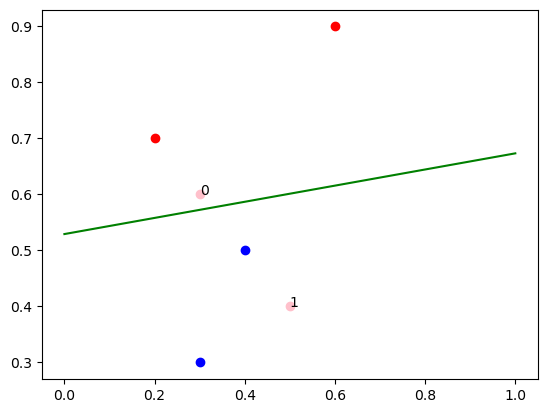

In [333]:
# The following plotting code i did not come up with... still very hard for me to write visualization code

# Plotting the training data
plt.scatter(X[y==0][:, 0], X[y ==0][:, 1], color = "red", label = "Class 0")
plt.scatter(X[y==1][:, 0], X[y ==1][:, 1], color = "blue", label = "Class 1")

# Boundaries
x1_vals = np.linspace(0, 1, 100)
x2_vals = -(theta[0] + theta[1] * x1_vals) / theta[2]
plt.plot(x1_vals, x2_vals, color="green", label="Decision boundary")

# Plot the new preds
plt.scatter(X_new[:, 0], X_new[:, 1], color = "pink", label = "New points")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legen